# Suicide Detection Model

In [101]:
import pandas as pd
import pyprind
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading In Data and Basic EDA

In [124]:
file_path = r"C:\Users\ryan_\OneDrive\Desktop\Suicide_Detection.csv"

# Define column names based on the first line of the file
df = pd.read_csv(file_path, index_col = 0)

# Read the f

In [103]:
print("Dimensions: ", df.shape, "with", df.shape[0], "rows", "and", df.shape[1],"columns")

Name_Columns = df.columns
print(Name_Columns)

Dimensions:  (232074, 2) with 232074 rows and 2 columns
Index(['text', 'class'], dtype='object')


In [104]:
df.describe()

,text,class
count,232074,232074
unique,232074,2
top,Ex Wife Threatening SuicideRecently I left my ...,suicide
freq,1,116037


## Generic Preprocessing

In [105]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
text     0
class    0
dtype: int64


In [106]:
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()
duplicate_data = df[duplicate_rows]

print(f"Number of duplicate rows: {num_duplicates}")
print("Duplicate rows:", duplicate_data)

Number of duplicate rows: 0
Duplicate rows: Empty DataFrame
Columns: [text, class]
Index: []


In [107]:
df['class'].value_counts()

class
suicide        116037
non-suicide    116037
Name: count, dtype: int64

## Further EDA

<Axes: xlabel='class', ylabel='Count'>

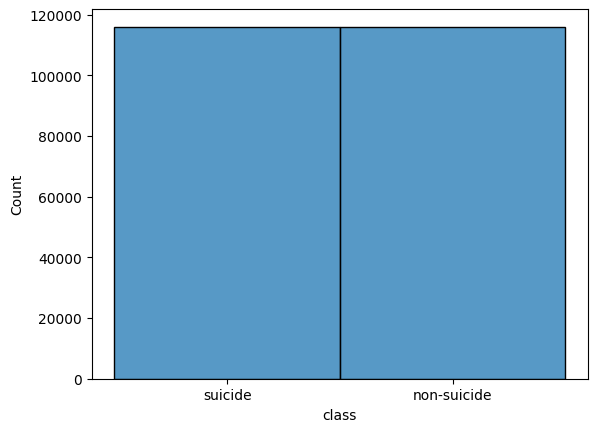

In [108]:
sns.histplot(df['class'])

In [109]:
suicide = df[df['class']=='suicide']['text']
nonsuicide = df[df['class']=='non-suicide']['text']

In [110]:
suicide.head()

2     Ex Wife Threatening SuicideRecently I left my ...
8             i need helpjust help me im crying so hard
9     I’m so lostHello, my name is Adam (16) and I’v...
11    Honetly idkI dont know what im even doing here...
12    [Trigger warning] Excuse for self inflicted bu...
Name: text, dtype: object

In [111]:
nonsuicide.head()

3     Am I weird I don't get affected by compliments...
4     Finally 2020 is almost over... So I can never ...
16    Everyone wants to be "edgy" and it's making me...
24    Fuck the verizon smart family app I can’t even...
26    Well, Im screwed. I locked myself in the schoo...
Name: text, dtype: object

### WordCloud

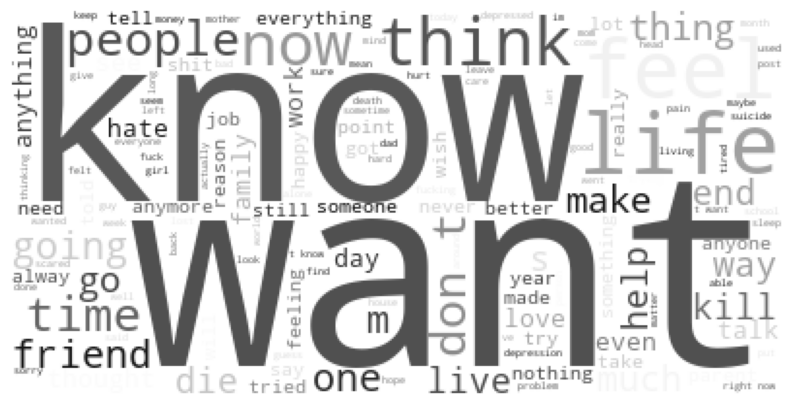

In [112]:
from wordcloud import WordCloud

def WORDCLOUD(data, colormap):
    wc = WordCloud(
        background_color="white",
        max_words = 1500,
        colormap=colormap,
        random_state=24
        
    ).generate(' '.join(data))
    plt.subplots(figsize=(10,10))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
    
WORDCLOUD(suicide, colormap='Grays')

    
    
    
    
    

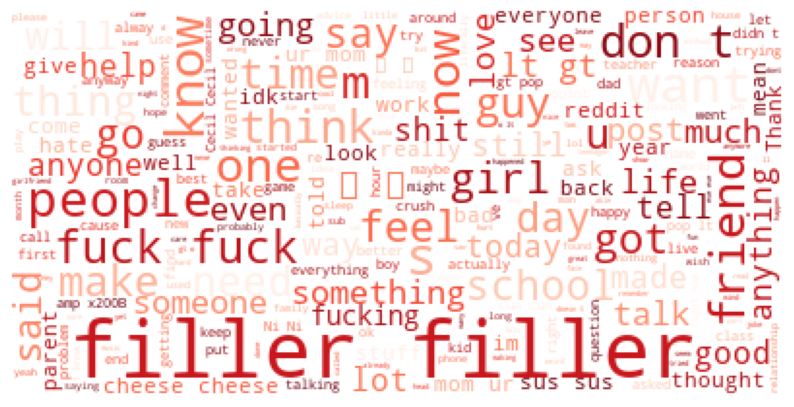

In [113]:
WORDCLOUD(nonsuicide, colormap='Reds')

### Post Length 

C:\Users\ryan_\AppData\Local\Temp\ipykernel_50244\771468372.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(suicide_length,
C:\Users\ryan_\AppData\Local\Temp\ipykernel_50244\771468372.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nonsuicide_length, color = '#03fcb1', ax = ax1)


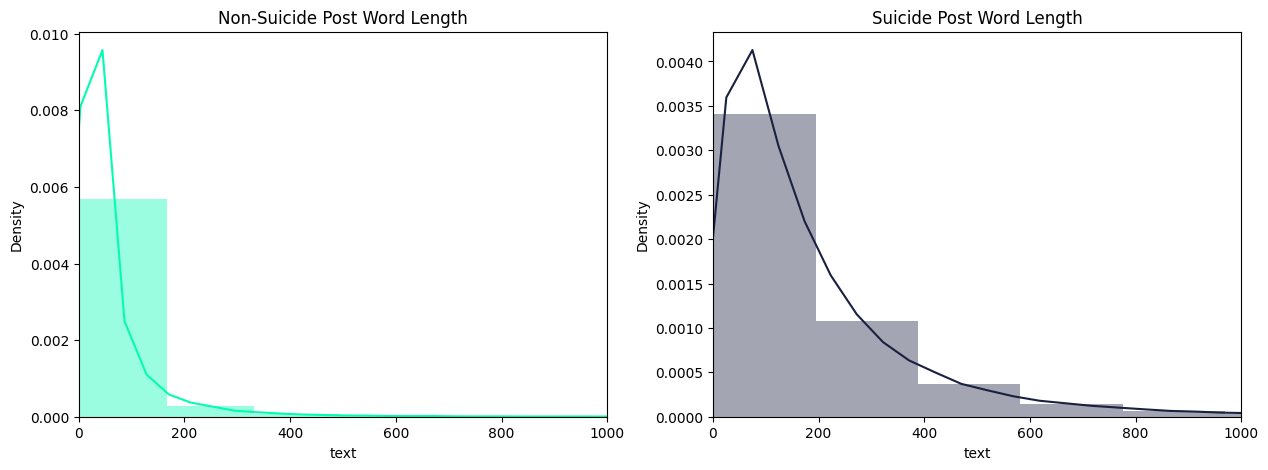

In [114]:
def str_length(text):
    return len(text)



def lenght_plot(suicide_length,nonsuicide_length, xlim_range = None):
                title1 = "Suicide Post Word Length"
                title2 = "Non-Suicide Post Word Length"
                fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))
                sns.distplot(suicide_length, 
                color = '#192040', ax=ax2)
                ax2.set_title(title1)
                sns.distplot(nonsuicide_length, color = '#03fcb1', ax = ax1)
                ax1.set_title(title2)
                
                if xlim_range:
                    ax1.set_xlim(xlim_range)
                    ax2.set_xlim(xlim_range)
                plt.show()
                
xlim_range = (0, 1000)

suicide_length = suicide.str.split().apply(lambda x: str_length(x))   
nonsuicide_length = nonsuicide.str.split().apply(lambda x: str_length(x))

lenght_plot(suicide_length, nonsuicide_length, xlim_range)

                
                
    

# Text Cleaning and Tokenizing 

In [115]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['class'] = label_encoder.fit_transform(df['class'])

df.head()


,text,class
2,Ex Wife Threatening SuicideRecently I left my ...,1
3,Am I weird I don't get affected by compliments...,0
4,Finally 2020 is almost over... So I can never ...,0
8,i need helpjust help me im crying so hard,1
9,"I’m so lostHello, my name is Adam (16) and I’v...",1


In [127]:
import re 
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


class TextCleaner:
    def text_cleaner(self, text):
        cleaned_text = text.str.replace("'", "'")
        cleaned_text = re.sub(r'<[^>]+>','', text)
        cleaned_text = re.sub(r'https\S+','',text)
        return cleaned_text
    def lowercase_text(self, text):
        cleaned_text = text.lower()
        return cleaned_text
    def
    
        
        
        
    
    return clean_text


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ryan_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ryan_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ryan_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [144]:

df['text'] = df['text'].apply(lambda x: text_cleaner(x))

In [122]:
df['text'].head()

2    ex wife threaten suiciderec left wife good che...
3    weird nt get affect compliment come someon kno...
4    final 2020 almost  never hear  2020 bad year  ...
8                       need helpjust help im cri hard
9    ’ losthello  name adam  16  ’ struggl year ’ a...
Name: text, dtype: object

In [123]:
df.head()

,text,class
2,ex wife threaten suiciderec left wife good che...,1
3,weird nt get affect compliment come someon kno...,0
4,final 2020 almost never hear 2020 bad year ...,0
8,need helpjust help im cri hard,1
9,’ losthello name adam 16 ’ struggl year ’ a...,1


TypeError: 'DataFrame' object is not an iterator